In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
#load dataset
iris = sns.load_dataset('iris')

In [7]:
#display the first few rows of the dataset
print("Head of the Dataset:")
print(iris.head())

Head of the Dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [9]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [11]:
#summary statistics
print("\n Summary Statistics:\n")
print(iris.describe())


 Summary Statistics:

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


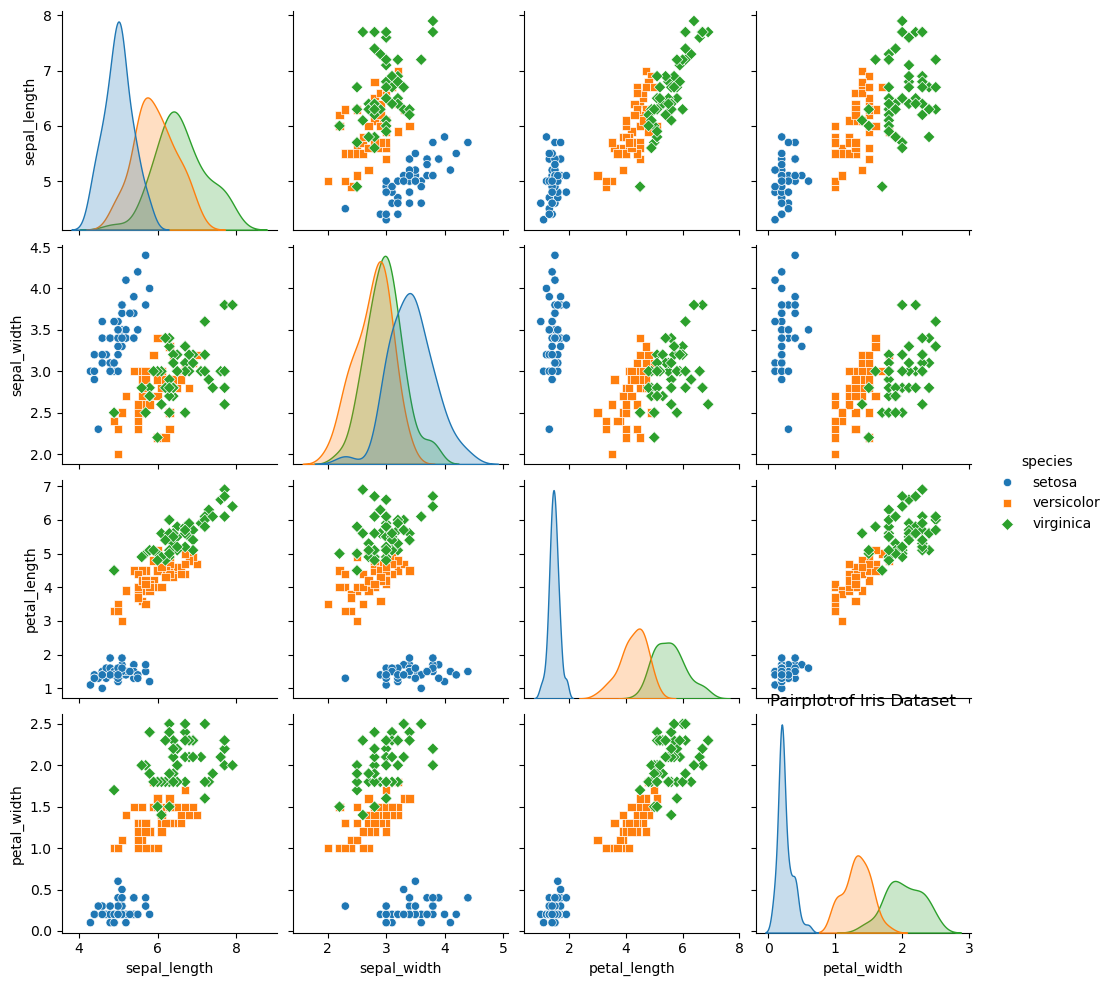

In [15]:
#data visualization
#pairplot to visualize relationships between variables
sns.pairplot(iris, hue='species',markers=['o', 's', 'D'])
plt.title("Pairplot of Iris Dataset")
plt.show()

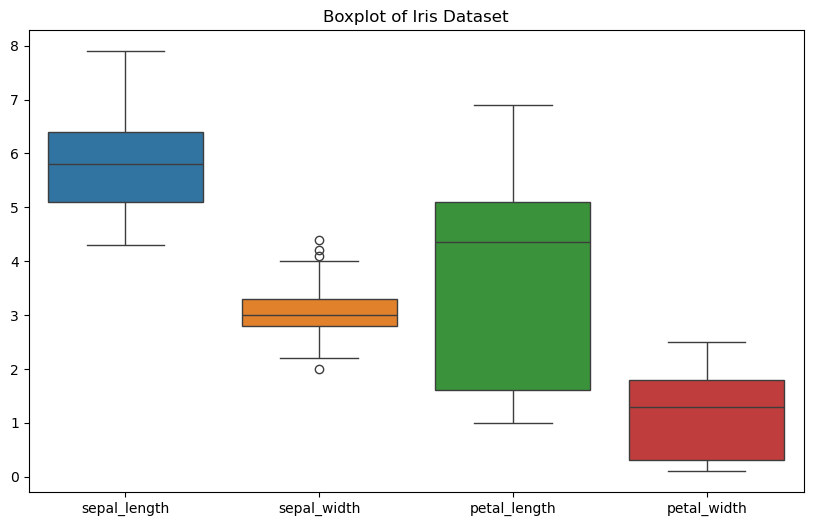

In [17]:
#boxplot to visualize outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=iris)
plt.title("Boxplot of Iris Dataset")
plt.show()

In [19]:
#missing value analysis
print("Missing Value Analysis")
print(iris.isnull().sum())

Missing Value Analysis
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


<Axes: >

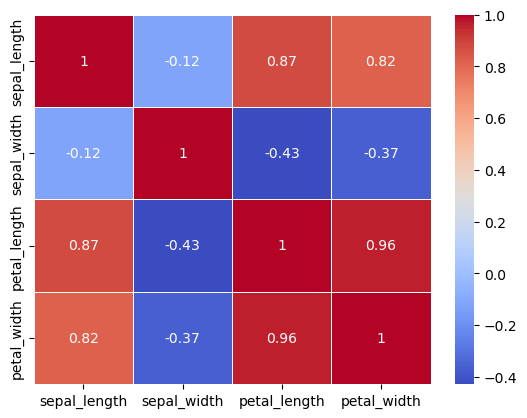

In [25]:
#correlation heatmap
corr = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()
sns.heatmap(corr, annot = True, cmap = "coolwarm", linewidth = 0.5) 

In [27]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(iris.iloc[:, :-1])
scaled_features

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [29]:
#apply PCA to reduce dimensionality
pca = PCA(n_components=2)
p_c = pca.fit_transform(scaled_features)

In [31]:
principal_df = pd.DataFrame(data = p_c, columns = ['PC1', 'PC2'])

In [33]:
final_df = pd.concat([principal_df, iris[['species']]], axis=1)

In [35]:
final_df

,PC1,PC2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa
...,...,...,...
145,1.870503,0.386966,virginica
146,1.564580,-0.896687,virginica
147,1.521170,0.269069,virginica
148,1.372788,1.011254,virginica


<Axes: xlabel='PC1', ylabel='PC2'>

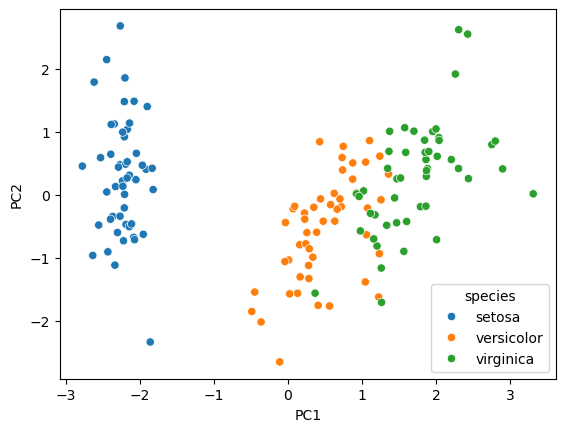

In [37]:
#scatterplot of principal components
sns.scatterplot(x = 'PC1', y = 'PC2', hue='species', data = final_df)